In [63]:
# DecisionTreeClassifier best
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X = data[:, :34]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# деревья решений
max_score_test = 0
#training_accuracy = []
#test_accuracy = []
for max_features in range(1, 5, 1):
    for max_depth in range(1, 5, 1):
        for min_samples_leaf in range(1, 5, 1):
            #print("max_features: ", max_features)
            #print("max_depth: ", max_depth)
            #print("min_samles_leaf", min_samples_leaf)
            Tree = DecisionTreeClassifier(random_state = 1, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            #Tree = DecisionTreeClassifier(random_state = 1, min_samples_leaf=min_samples_leaf)
            Tree.fit(X_train, y_train)
            train = Tree.score(X_train, y_train)*100
            test = Tree.score(X_test, y_test)*100
            #training_accuracy.append(train)
            #test_accuracy.append(test)
            if (max_score_test < Tree.score(X_test, y_test)*100) :
                max_score_test = test
                score_train = train
                best_max_features = max_features
                best_max_depth = max_depth
                best_min_samples_leaf = min_samples_leaf
print("score_train: ", score_train)
print("best_score_test: ", max_score_test)
print("best_max_features: ", best_max_features)
print("best_max_depth: ", best_max_depth)
print("best_min_samle_leaf", best_min_samples_leaf)

#plt.plot(list(range(1, 15)), training_accuracy, label = "Training")
#plt.plot(list(range(1, 15)), test_accuracy, label = "Test")
#plt.ylabel("Accuracy")
#plt.xlabel("max_samples_leaf")
#plt.legend()

score_train:  91.63498098859316
best_score_test:  86.36363636363636
best_max_features:  3
best_max_depth:  3
best_min_samle_leaf 1


In [106]:
# RandomForestClassifier best
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X = data[:, :34]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# случайный лес
max_score_test = 0
#training_accuracy = []
#test_accuracy = []
for n_estimators in range(65, 70, 1):
    for max_features in range(7, 10, 1):
        for max_depth in range(7, 9, 1):
            for min_samples_leaf in range(1, 3, 1):
                #print("max_features: ", max_features)
                #print("max_depth: ", max_depth)
                #print("min_samles_leaf", min_samples_leaf)
                #forest = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=1)
                forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
                forest.fit(X_train, y_train)
                train = forest.score(X_train, y_train)*100
                test = forest.score(X_test, y_test)*100
                #training_accuracy.append(train)
                #test_accuracy.append(test)
                if (max_score_test < forest.score(X_test, y_test)*100) :
                #if (test > 96.59 and flag == False):
                    max_score_test = test
                    score_train = train
                    best_max_features = max_features
                    best_max_depth = max_depth
                    best_min_samples_leaf = min_samples_leaf
                    best_n_estimators = n_estimators
print("score_train: ", score_train)
print("best_score_test: ", max_score_test)
print("best_max_features: ", best_max_features)
print("best_max_depth: ", best_max_depth)
print("best_min_samles_leaf", best_min_samples_leaf)
print("best_n_estimators", n_estimators)

#plt.plot(list(range(1, 100)), training_accuracy, label = "Training")
#plt.plot(list(range(1, 100)), test_accuracy, label = "Test")
#plt.ylabel("Accuracy")
#plt.xlabel("num_experiment")
#plt.legend()

score_train:  99.23954372623575
best_score_test:  0
best_max_features:  7
best_max_depth:  8
best_min_samles_leaf 2
best_n_estimators 69


score_train:  97.33840304182509
best_score_test:  97.72727272727273
best_activation:  relu
best_alpha:  0.051
best_max_iter 29
best_hidden_layer_sizes [5, 5]


,g,b
0,1.0,0.0
1,0.9,0.1
2,1.0,0.0
3,0.2,0.8
4,0.0,1.0
...,...,...
83,1.0,0.0
84,1.0,0.0
85,0.0,1.0
86,0.3,0.7


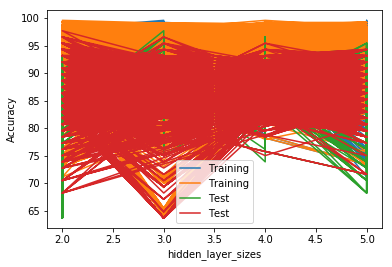

In [38]:
# MLP best
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X = data[:, :34]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

max_score_test = 0
training_accuracy = []
test_accuracy = []
alpha2 = []
for activation in ['relu', 'identity', 'logistic','tanh']:
    for alpha_100 in range(1, 1000, 50):
        for max_iter in range(15, 30, 1):
            for hidden_layer_sizes in [[2,2],[2,3],[2,4],[2,5],[3,2],[3,3],[3,4],[3,5],[4,2],[4,3],[4,4],[4,5],[5,2],[5,3],[5,4],[5,5]]:
                #print("max_features: ", max_features)
                #print("max_depth: ", max_depth)
                #print("min_samles_leaf", min_samples_leaf)
                mlp = MLPClassifier(solver="lbfgs", random_state = 1, activation=activation, alpha=alpha_100/1000, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)
                #mlp = MLPClassifier(solver="lbfgs", random_state = 1, hidden_layer_sizes=hidden_layer_sizes)
                mlp.fit(X_train, y_train)
                train = mlp.score(X_train, y_train)*100
                test = mlp.score(X_test, y_test)*100
                training_accuracy.append(train)
                test_accuracy.append(test)
                alpha2.append(hidden_layer_sizes)
                if (max_score_test < mlp.score(X_test, y_test)*100) :
                #if (test > 96.59 and flag == False):
                    max_score_test = test
                    score_train = train
                    best_activation = activation
                    best_alpha = alpha_100/1000
                    best_max_iter = max_iter
                    best_hidden_layer_sizes = hidden_layer_sizes
print("score_train: ", score_train)
print("best_score_test: ", max_score_test)
print("best_activation: ", best_activation)
print("best_alpha: ", best_alpha)
print("best_max_iter", max_iter)
print("best_hidden_layer_sizes", hidden_layer_sizes)

plt.plot(alpha2, training_accuracy, label = "Training")
plt.plot(alpha2, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("hidden_layer_sizes")
plt.legend()

np_resuts = np.array(np.around(mlp.predict_proba(X_test), decimals=1))
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = ['g','b']
display(data_pd)

Text(0, 0.5, 'relu(x), tanh(x)')

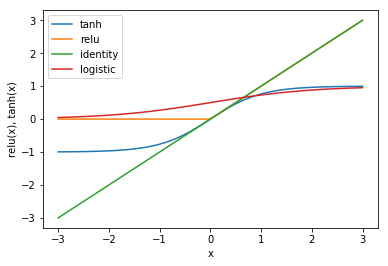

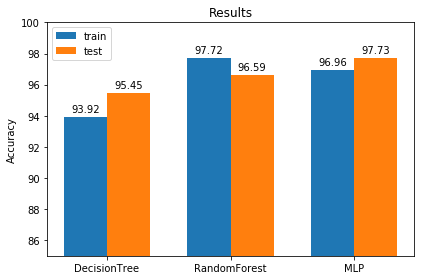

In [92]:
# Гистограмма результатов

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['DecisionTree', 'RandomForest', 'MLP']
s1 = [95.45, 96.59, 97.73]
s2 = [93.92, 97.72, 96.96]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, s2, width, label='train')
r2 = ax.bar(x + width/2, s1, width, label='test')

ax.set_ylabel('Accuracy')
ax.set_title('Results')
ax.set_ylim(85,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(r1)
autolabel(r2)

fig.tight_layout()

plt.show()

In [37]:
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X = data[:, :34]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

Tree = DecisionTreeClassifier(random_state = 1, max_features=16, max_depth=7, min_samples_leaf=7)
Tree.fit(X_train, y_train)
print("Tree.score train: {:.2f}%".format(Tree.score(X_train, y_train)*100))
print("Tree.score test: {:.2f}%\n".format(Tree.score(X_test, y_test)*100))

forest = RandomForestClassifier(n_estimators=21, max_features=9, max_depth=8, min_samples_leaf=2, random_state=1)
forest.fit(X_train, y_train)
print("forest.score train: {:.2f}%".format(forest.score(X_train, y_train)*100))
print("forest.score test: {:.2f}%\n".format(forest.score(X_test, y_test)*100))

Tree.score train: 93.92%
Tree.score test: 95.45%

forest.score train: 97.72%
forest.score test: 96.59%

